<a href="https://colab.research.google.com/github/sebastianrpo/SPIII_MiniP2/blob/main/MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones**
##### Tratamiento de Señales III
##### Facultad de Ingeniería
##### Universidad de Antioquia
##### Daniela Acevedo Zuluaga - Sebastian Restrepo Valencia
##### 2023-1

## Carga de archivos e importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
!wget "https://github.com/sebastianrpo/SPIII_MiniP2/blob/main/dfMinip1.csv?raw=true" -O "dfMinip1.csv"

--2023-05-07 23:33:25--  https://github.com/sebastianrpo/SPIII_MiniP2/blob/main/dfMinip1.csv?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/sebastianrpo/SPIII_MiniP2/raw/main/dfMinip1.csv [following]
--2023-05-07 23:33:26--  https://github.com/sebastianrpo/SPIII_MiniP2/raw/main/dfMinip1.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sebastianrpo/SPIII_MiniP2/main/dfMinip1.csv [following]
--2023-05-07 23:33:26--  https://raw.githubusercontent.com/sebastianrpo/SPIII_MiniP2/main/dfMinip1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [3]:
data = pd.read_csv('dfMinip1.csv') # Cargamos el dataframe.
data

Pot(SSA1)  F_Pmax(SSA1)  Energia(SSA1)  Media(SSA1)  Var(SSA1)  Max(SSA1)  \
0    0.013380     22.882812      13.767863     0.002846   0.000005   0.013380   
1    0.013380     22.882812      13.767863     0.002846   0.000005   0.013380   
2    0.013380     22.882812      13.767863     0.002846   0.000005   0.013380   
3    0.013380     22.882812      13.767863     0.002846   0.000005   0.013380   
4    0.013380     22.882812      13.767863     0.002846   0.000005   0.013380   
..        ...           ...            ...          ...        ...        ...   
58   0.036245      1.380859       7.507878     0.004065   0.000034   0.036245   
59   0.034564      1.380859       6.904288     0.003953   0.000031   0.034564   
60   0.032889      1.380859       6.158012     0.003702   0.000027   0.032889   
61   0.032889      1.380859       6.158012     0.003702   0.000027   0.032889   
62   0.032889      1.380859       6.158012     0.003702   0.000027   0.032889   

    Min(SSA1)  Pot(SSA2)  F_Pmax(SSA2)  Energia(SSA2)  ...  Max(SSA2)  \
0    0.000306   0.018768      1.183594       9.166453  ...   0.018768   
1    0.000306   0.018768      1.183594       9.166453  ...   0.018768   
2    0.000306   0.018768      1.183594       9.166453  ...   0.018768   
3    0.000306   0.018768      1.183594       9.166453  ...   0.018768   
4    0.000306   0.018768      1.183594       9.166453  ...   0.018768   
..        ...        ...           ...            ...  ...        ...   
58   0.000221   0.004788     24.658203       0.961714  ...   0.004788   
59   0.000186   0.006359     49.513672       1.123659  ...   0.006359   
60   0.000144   0.009995     49.908203       1.487689  ...   0.009995   
61   0.000144   0.009995     49.908203       1.487689  ...   0.009995   
62   0.000144   0.009995     49.908203       1.487689  ...   0.009995   

    Min(SSA2)  Pot(SSA3)  F_Pmax(SSA3)  Energia(SSA3)  Media(SSA3)  \
0    0.000598   0.013646      1.183594      10.723613     0.003142   
1    0.000598   0.013646      1.183594      10.723613     0.003142   
2    0.000598   0.013646      1.183594      10.723613     0.003142   
3    0.000598   0.013646      1.183594      10.723613     0.003142   
4    0.000598   0.013646      1.183594      10.723613     0.003142   
..        ...        ...           ...            ...          ...   
58   0.000264   0.006026     38.466797       1.001902     0.001036   
59   0.000016   0.003872     17.162109       0.617351     0.001213   
60   0.000056   0.003723     16.767578       0.627101     0.001126   
61   0.000056   0.003723     16.767578       0.627101     0.001126   
62   0.000056   0.003723     16.767578       0.627101     0.001126   

       Var(SSA3)  Max(SSA3)  Min(SSA3)  Tipo  
0   6.561553e-06   0.013646   0.000029  Tele  
1   6.561553e-06   0.013646   0.000029  Tele  
2   6.561553e-06   0.013646   0.000029  Tele  
3   6.561553e-06   0.013646   0.000029  Tele  
4   6.561553e-06   0.013646   0.000029  Tele  
..           ...        ...        ...   ...  
58  1.335983e-06   0.006026   0.000015   Reg  
59  4.200849e-07   0.003872   0.000226   Reg  
60  3.440663e-07   0.003723   0.000213   Reg  
61  3.440663e-07   0.003723   0.000213   Reg  
62  3.440663e-07   0.003723   0.000213   Reg  

[63 rows x 22 columns]

In [4]:
dataSismo = np.asarray(data.drop('Tipo',1))
Tipo = data['Tipo'].tolist()

# Creamos una lista de etiquetas numéricas.
Tags = ["" for x in range(63)]
for i in range(0,21,1):
  Tags[i] = 0       # El valor de 0 corresponde a los telesismos
for j in range(21,42,1):
  Tags[j] = 1       # El valor de 1 corresponde a los sismos locales
for l in range(42,63,1):
  Tags[l] = 2       # El valor de 2 corresponde a los sismos regionales

<ipython-input-4-76cc3247ff9e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataSismo = np.asarray(data.drop('Tipo',1))


In [5]:
pca = PCA(n_components = 21)  # project from 64 to 2 dimensions
projectedZ = pca.fit_transform(dataSismo) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
BasisW = pca.components_
print("Dataframe size: ", data.shape)
print("Z Projection size: ", projectedZ.shape)
print("PCA explained variance: ", pca.explained_variance_)
print("W Projection size: ", BasisW.shape)

Dataframe size:  (63, 22)
Z Projection size:  (63, 21)
PCA explained variance:  [1.23716960e+03 5.49458638e+02 2.65100670e+02 6.65243782e+01
 3.90024110e+01 1.63788311e-01 5.17434718e-05 2.86011581e-05
 1.13825001e-05 9.03441360e-08 4.41552724e-08 1.17915114e-08
 3.67223545e-09 1.18479956e-09 9.94674999e-10 1.63050925e-11
 4.32903169e-13 1.59888481e-13 6.40000309e-34 7.44314709e-37
 1.38020704e-37]
W Projection size:  (21, 21)


(21,) 
 Explained variance 0.9818457699615174


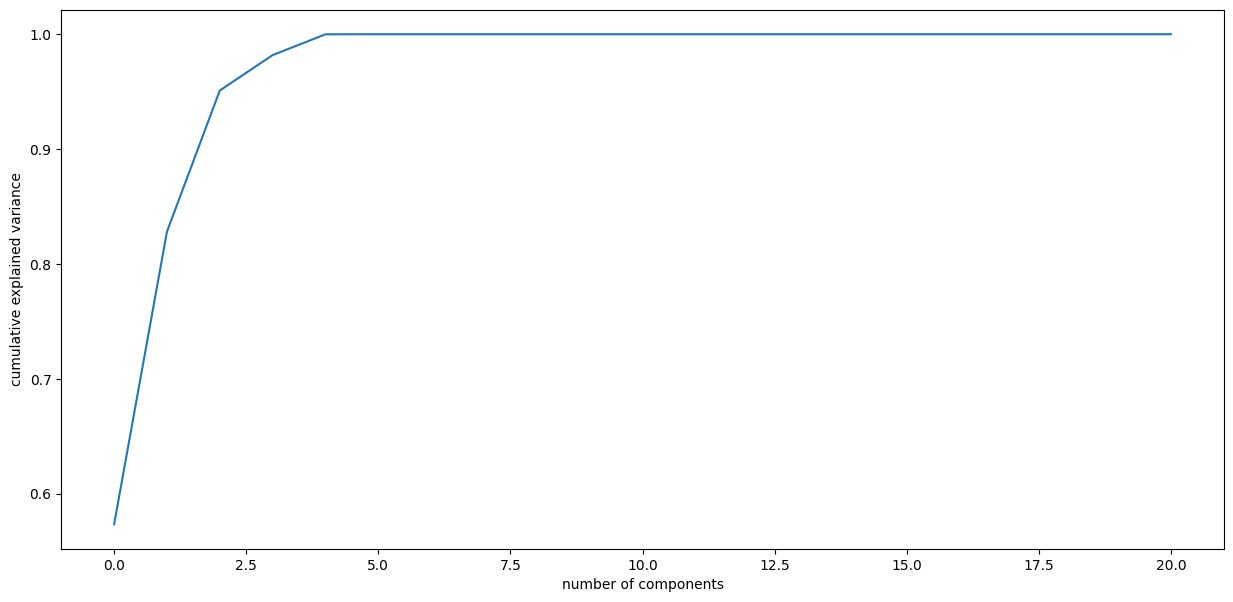

In [6]:
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:4]))
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Al llegar a las 5 componentes ya se obtiene un 99.9% de la varianza, por lo que solo antes de las 5 componentes se pueden observar cambios significativos en los datos proyectados

<ipython-input-7-fccd6acffa84>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))


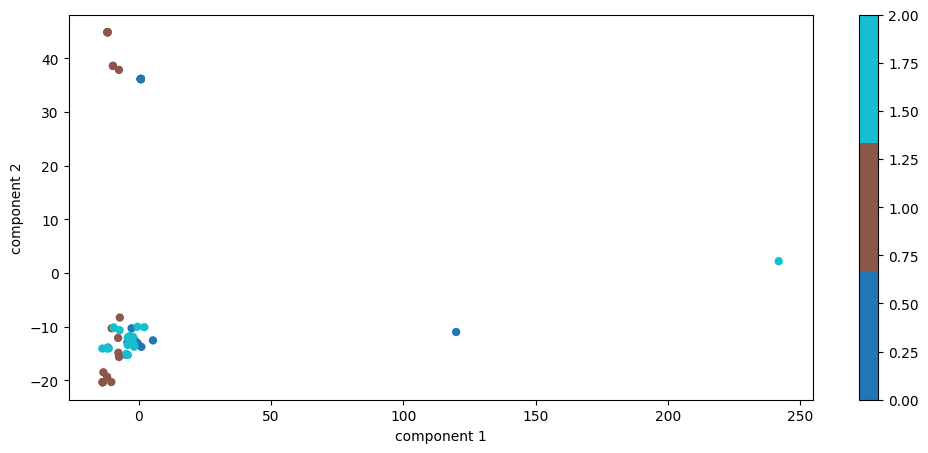

In [7]:
plt.figure(figsize=(12,5))
plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [8]:
def projectedZ_Components(n,data):
  pca = PCA(n_components = n)
  projectedZ = pca.fit_transform(data)
  BasisW = pca.components_
  print("Dataframe size: ", data.shape)
  print("Z Projection size: ", projectedZ.shape)
  print("PCA explained variance: ", pca.explained_variance_)
  print("W Projection size: ", BasisW.shape)
  return projectedZ

Dataframe size:  (63, 21)
Z Projection size:  (63, 2)
PCA explained variance:  [1237.16959613  549.45863779]
W Projection size:  (2, 21)


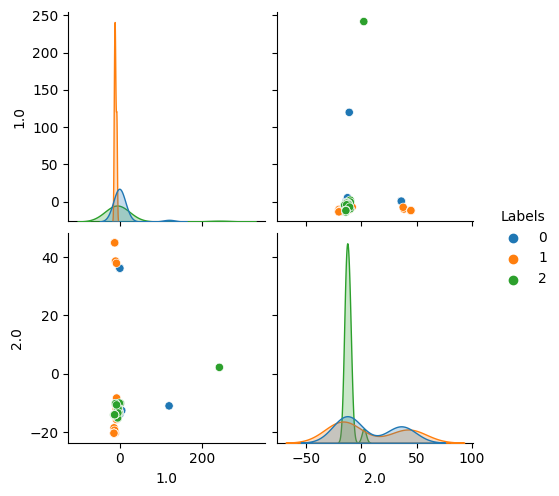

In [9]:
n = 2
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 21)
Z Projection size:  (63, 4)
PCA explained variance:  [1237.16959613  549.45863779  265.10066955   66.52437816]
W Projection size:  (4, 21)


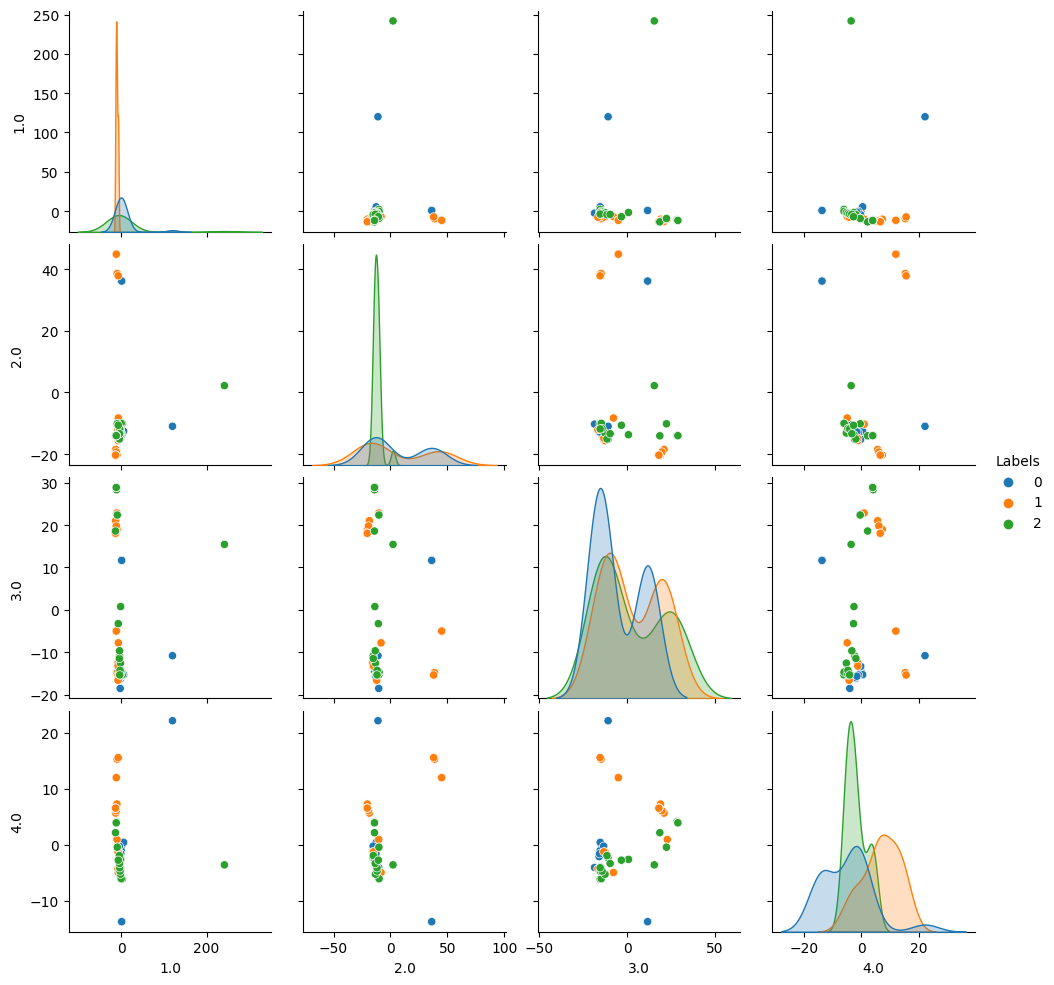

In [10]:
n = 4
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 21)
Z Projection size:  (63, 8)
PCA explained variance:  [1.23716960e+03 5.49458638e+02 2.65100670e+02 6.65243782e+01
 3.90024110e+01 1.63788311e-01 5.17434718e-05 2.86011581e-05]
W Projection size:  (8, 21)


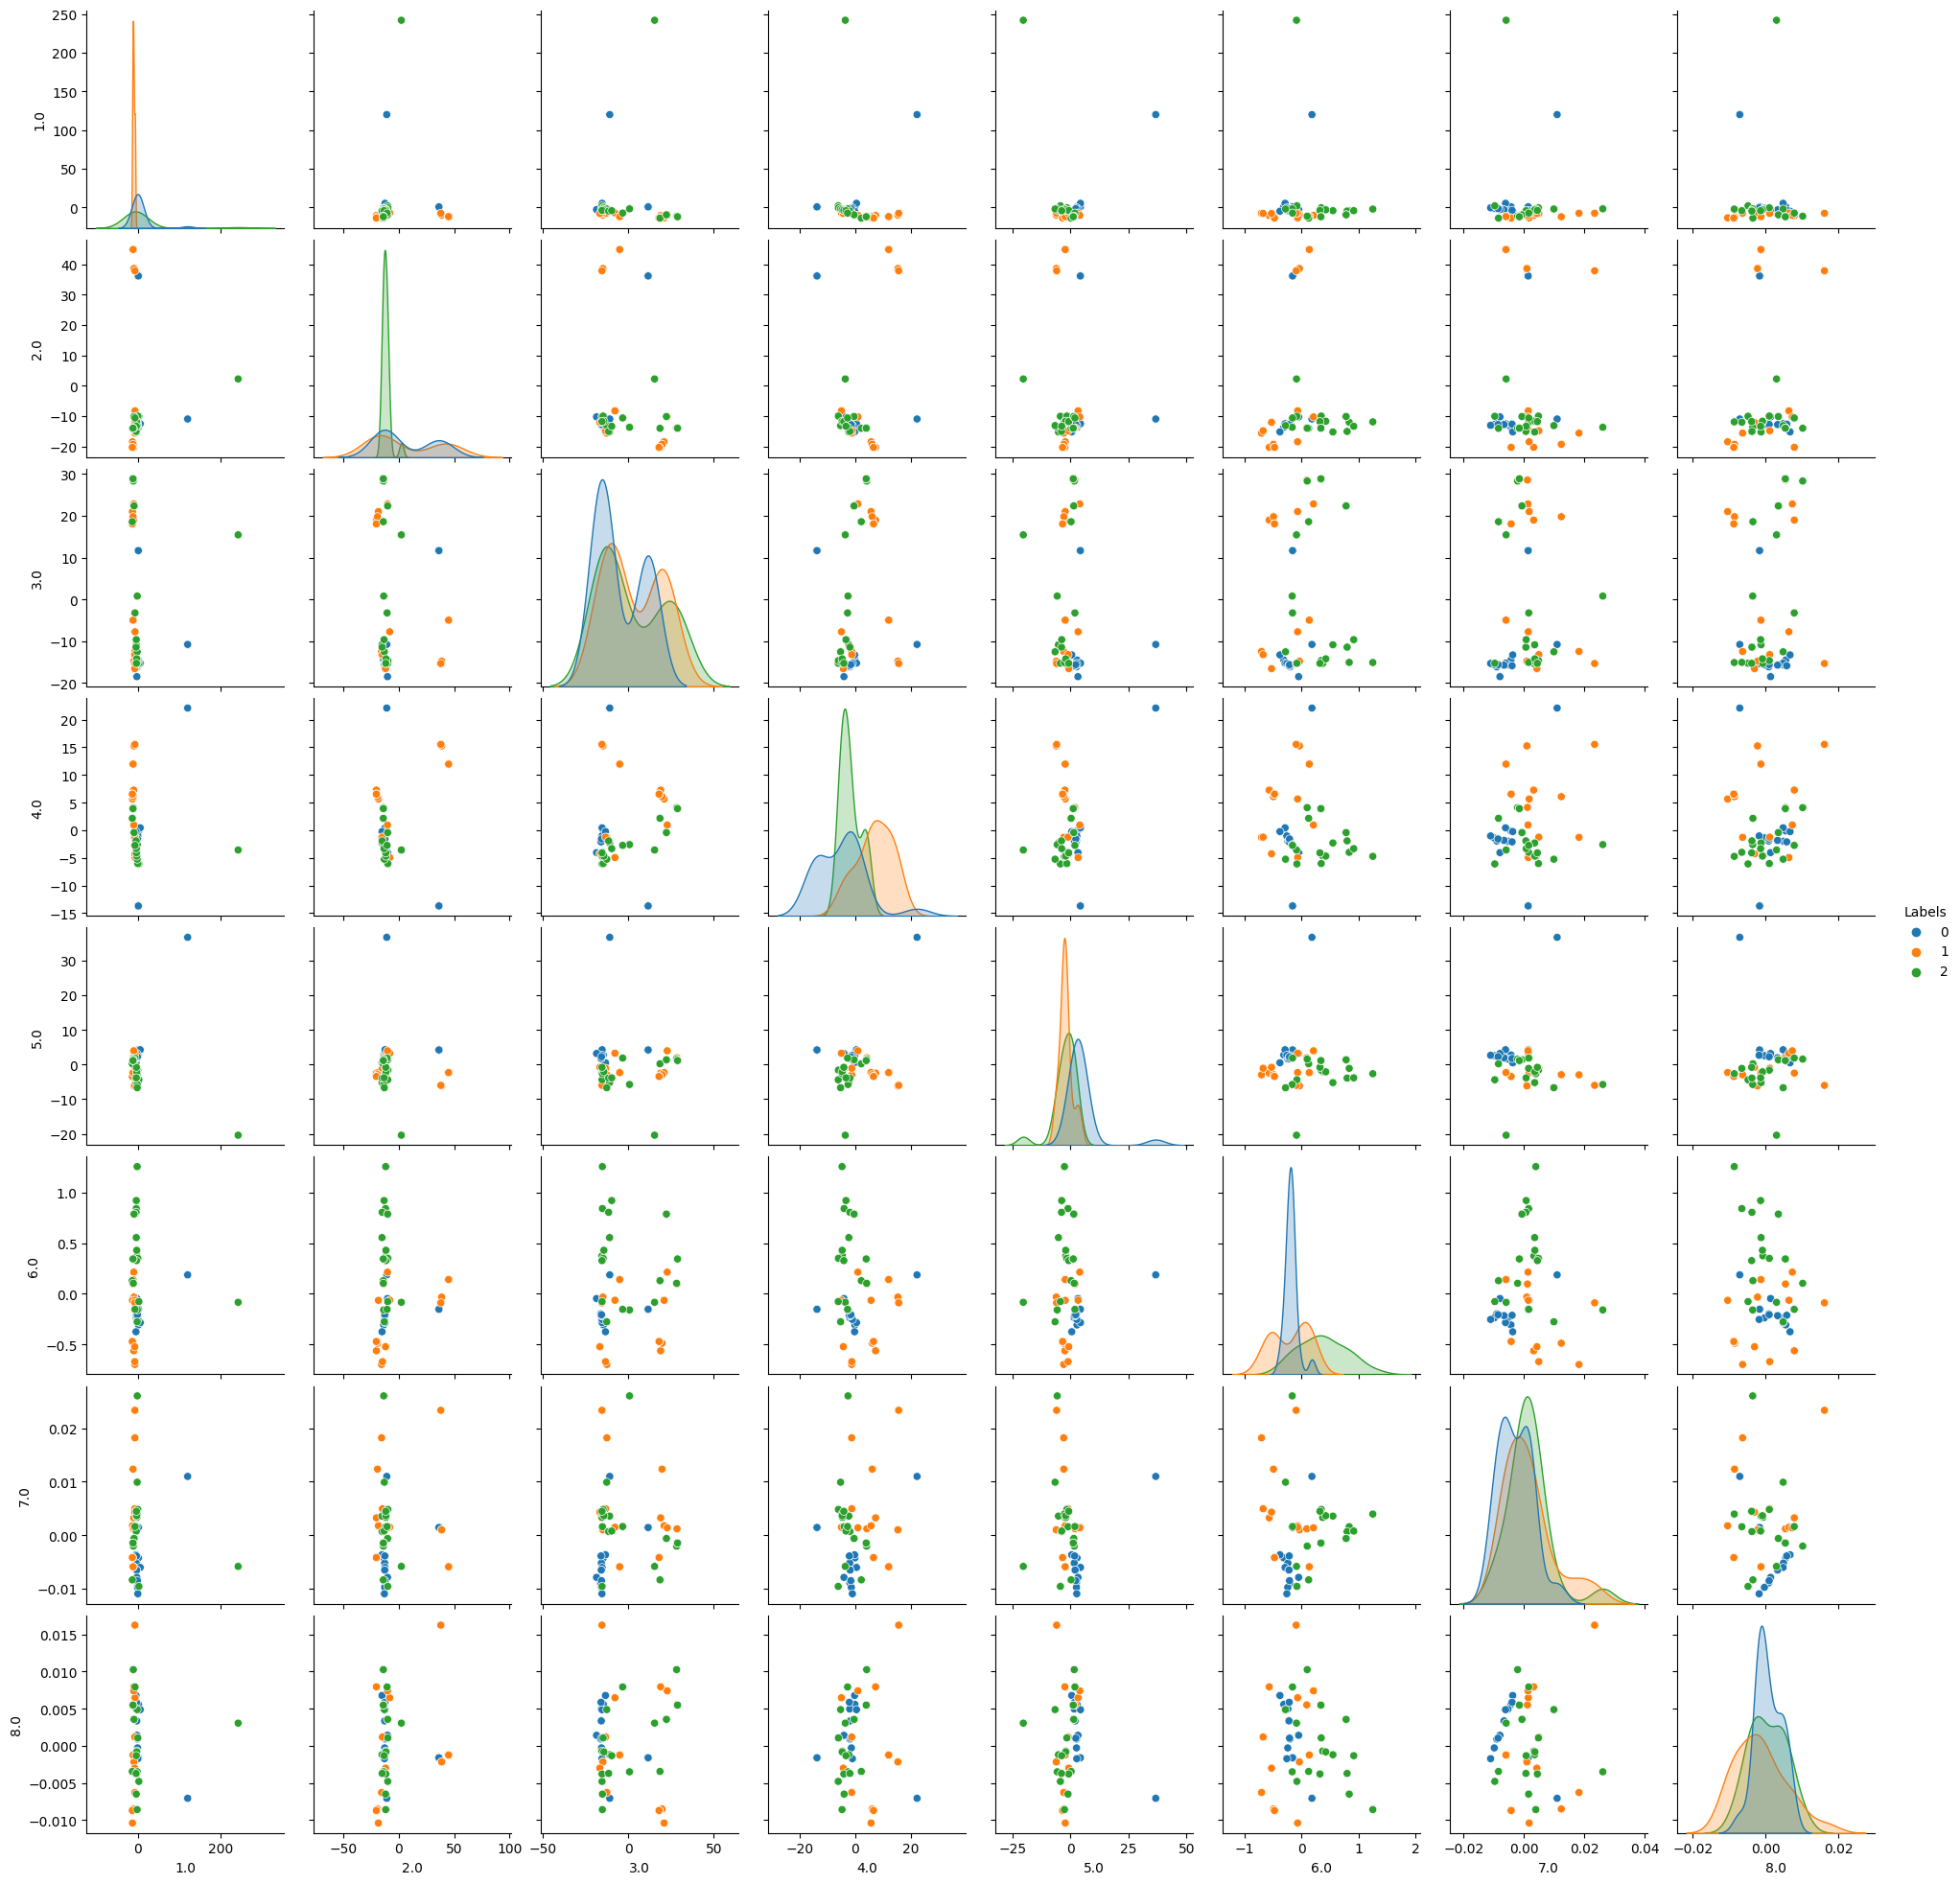

In [11]:
n = 8
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Para el análisis, se debe tener en cuenta que las etiquetas azules son Telesismo, las naranjadas son local y las verdes son regional.

En las primeras 4 componentes, no se logra observar un cambio, y todos los puntos siguen bastante agrupados. En 5 se pueden empezar a notar algunos desagrupamientos leves. En 6 componentes, se pueden observar algunos agrupamientos entre colores, y aunque no es muy notorio si da resultados mejores a los que se tenían en el miniproyecto 1. Al ir graficando nuevas componentes, se ve que el modelo pasa a tener una especie de sobreentrenamiento, y ya a pesar de tener más componentes, la información que se agrega pasa a ser contraproducente y nos daña la separación de los sismos que se logra con 6 componentes.

In [12]:
def Logistic_Regression(X, Y):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Accuracy Train: ',Acc_train)
  print('Accuracy Test: ',Acc_test)

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional'])
  ax1.plot()
  ax1.ax_.set_title('Matriz Confusión LR train')
  plt.show()

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional'])
  ax2.plot()
  ax2.ax_.set_title('Matriz Confusión LR test')
  plt.show()
  return None

def Bayessian_Regression(X, t):
  pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
  pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
  pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

  # Seleccionamos los X de la clase 1
  X1 = X[t == 0]
  mu_C1 = np.mean(X1,axis = 0)
  # Seleccionamos los X de la clase 2
  X2 = X[t == 1]
  mu_C2 = np.mean(X2,axis = 0)
  # Seleccionamos los X de la clase 3
  X3 = X[t == 2]
  mu_C3 = np.mean(X3,axis = 0)

  plt.scatter(X[:,0],X[:,1],c = t)
  plt.plot(mu_C1[0],mu_C1[1],'or')
  plt.plot(mu_C2[0],mu_C2[1],'dg')
  plt.plot(mu_C3[0],mu_C3[1],'sy')

  N1 = np.sum(np.where(t == 0, 1., 0.))
  MU_1 = np.tile(mu_C1,(int(N1),1))
  S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)

  N2 = np.sum(np.where(t == 1, 1., 0.))
  MU_2 = np.tile(mu_C2,(int(N2),1))
  S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

  N3 = np.sum(np.where(t == 2, 1., 0.))
  MU_3 = np.tile(mu_C3,(int(N3),1))
  S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

  N = N1 + N2 + N3
  Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

  invSigma = np.linalg.inv(Sigma)
  w_C1 = invSigma@mu_C1
  w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

  w_C2 = invSigma@mu_C2
  w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

  w_C3 = invSigma@mu_C3
  w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

  # Para las activaciones
  A1 = (X@w_C1 + w_10).reshape(int(N),1)
  A2 = (X@w_C2 + w_20).reshape(int(N),1)
  A3 = (X@w_C3 + w_30).reshape(int(N),1)
  A = np.concatenate((A1,A2,A3),axis = 1)

  expA = np.exp(A)
  aux = np.sum(expA,axis = 1).reshape(int(N),1)
  auxM = np.tile(aux,(1,3))

  p_Ck_dado_X =  expA/auxM # Posterior: y_Est
  t_Est = np.argmax(p_Ck_dado_X, axis = 1)

  Acc = accuracy_score(t,t_Est)
  cMat = confusion_matrix(t,t_Est)

  print('Accuracy: ',Acc)
  
  ax = ConfusionMatrixDisplay(cMat, display_labels = ['telesismo','local','regional'])
  ax.plot()
  plt.show()
  return None

## Regresión logística para los datos de entrada


Accuracy Train:  0.6808510638297872
Accuracy Test:  0.8125


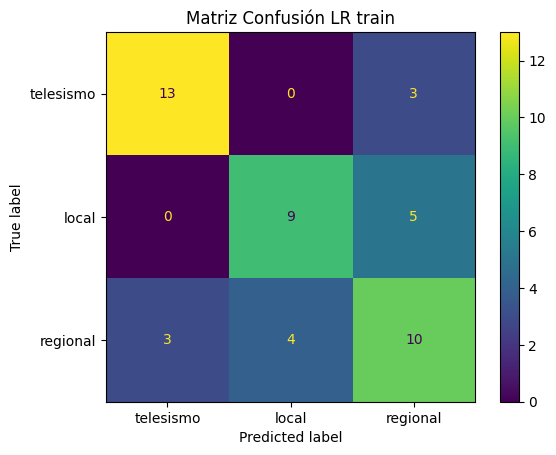

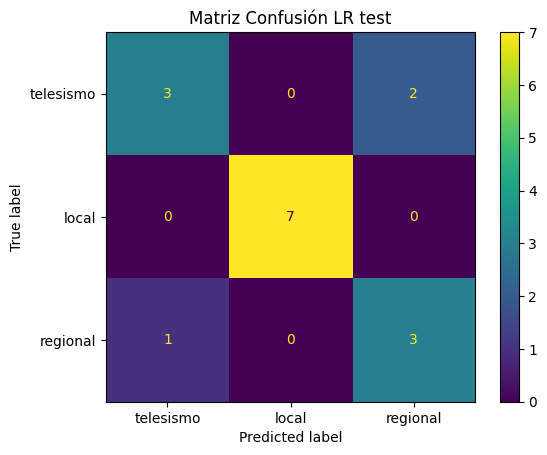

In [13]:
X = dataSismo[:, 2:4]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags
Logistic_Regression(X, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Train:  1.0
Accuracy Test:  0.875


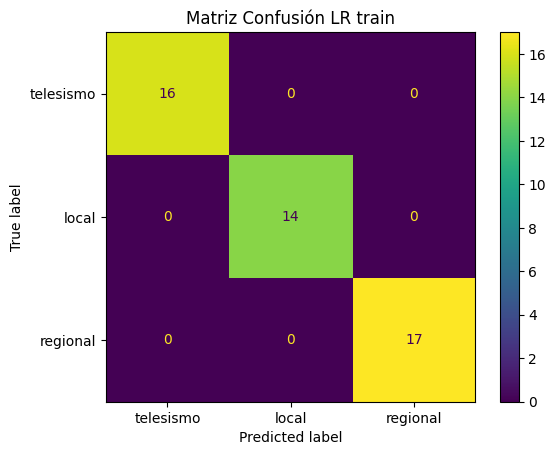

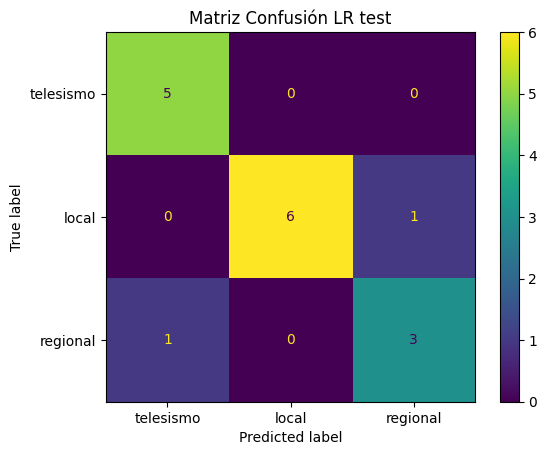

In [14]:
X = dataSismo[:, :]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags
Logistic_Regression(X, Y)

Se puede observar que tomando dos dimensiones se tiene una precisión de entrenamiento del 68% pero si tomamos todas las dimensiones se tiene una precisión del 100%.

## Regresión logística para el espacio latente

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Train:  1.0
Accuracy Test:  0.875


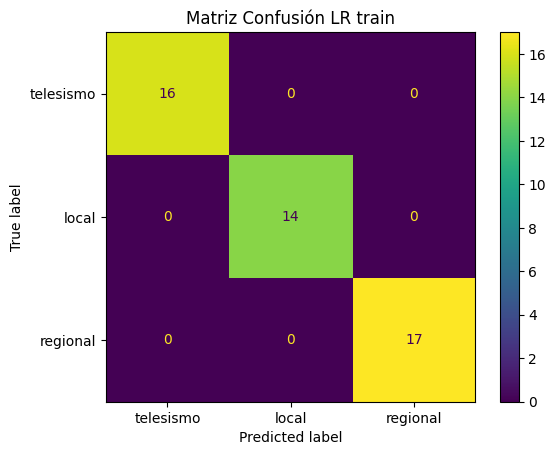

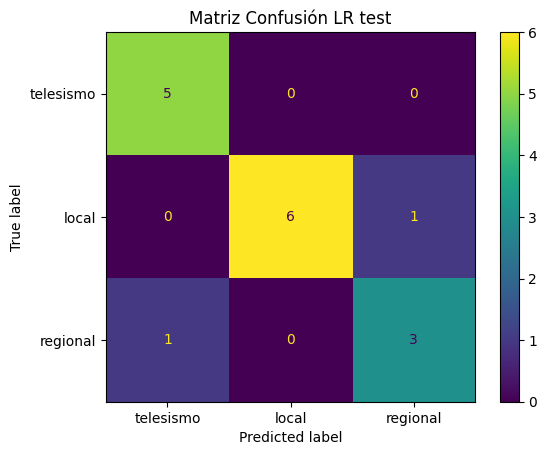

In [15]:
n=1
modelPCA = PCA(n_components=n)
X = dataSismo
X_PCA = pca.fit_transform(X)
Y = Tags
Logistic_Regression(X_PCA,Y)

En el espacio latente, al estar utilizando PCA, con solo tener un n=1 ya funciona con una precisión del 100%. 

## Clasificación Bayesiana para los datos del espacio de entrada

Accuracy:  0.5873015873015873


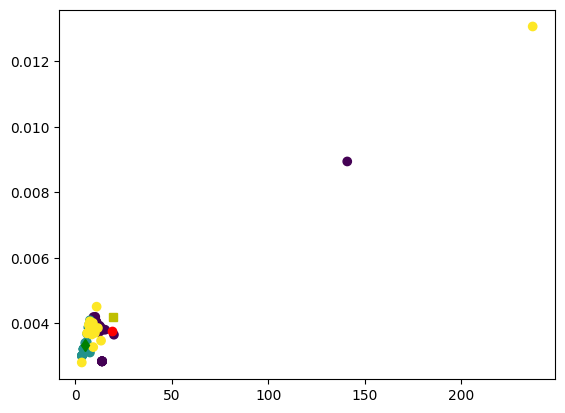

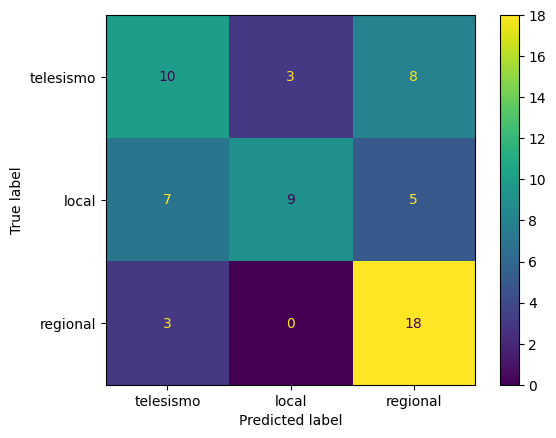

In [16]:
X = dataSismo[:, 2:4]
t = np.array(Tags)
Bayessian_Regression(X, t)

## Clasificacion Bayesiana para los datos del espacio latente

Accuracy:  0.9047619047619048


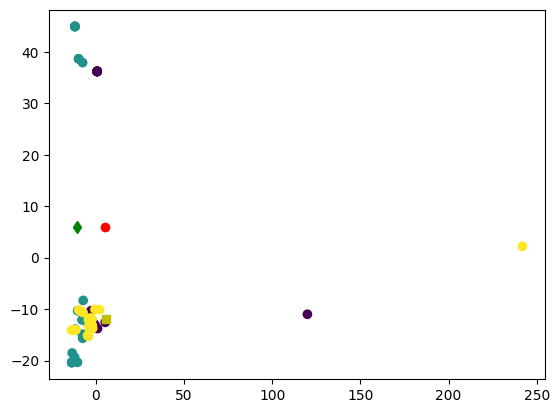

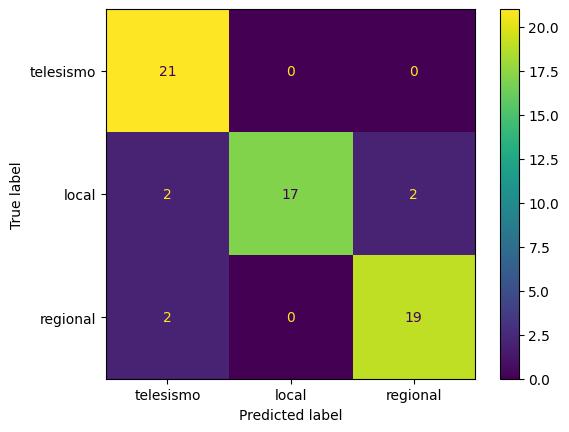

In [17]:
n = 8
modelPCA = PCA(n_components=n) # Hacemos PCA con n componentes.
X = dataSismo 
X_PCA = modelPCA.fit_transform(X)
t = np.array(Tags)
Bayessian_Regression(X_PCA, t)
     

Si se compara con la regresión logística, se puede ver claramente que se tienen peores resultados en la Bayesiana. Esto se puede deber a que la regresión logística puede funcionar mejor que la Bayesiana cuando se tienen grandes cantidades de datos o también a que la regresión logística es menos sensible a los valores atípicos y datos ruidosos que el modelo bayesiano

# Visualización de rostros

In [39]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
# the label to predict is the id of the person
y = lfw_people.target

# Particionar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el clasificador de regresión logística
clfLR = LogisticRegression(random_state=0, max_iter=2000)
clfLR.fit(X_train, y_train)

# Realizar predicciones
y_pred_testLR = clfLR.predict(X_test)

# Calcular la exactitud de los clasificadores
accTest_LR = accuracy_score(y_test, y_pred_testLR)

El accuracy para el clasificador de Regresion Logistica es: 0.8217054263565892


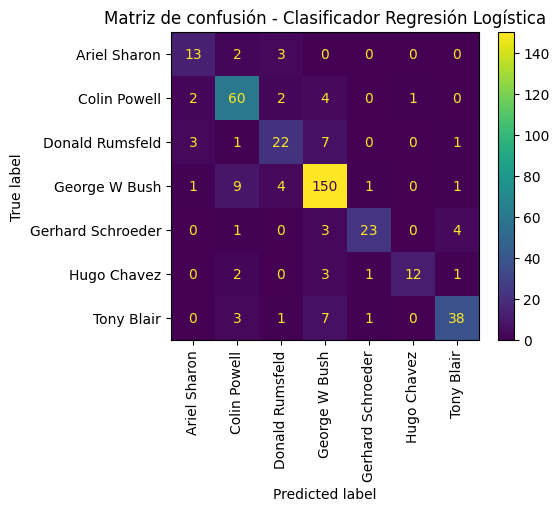

In [40]:
print(f'El accuracy para el clasificador de Regresion Logistica es: {accTest_LR}')

# Mostrar la matriz de confusión para el clasificador de regresión logística
cmLR = confusion_matrix(y_test, y_pred_testLR)
fig, ax = plt.subplots(figsize=(5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=lfw_people.target_names)
disp.plot(ax=ax, xticks_rotation=90)
plt.title('Matriz de confusión - Clasificador Regresión Logística')
plt.show()

La precisión en el clasificador de regresión logística sin PCA se comporta de una manera correcta ya que obtiene unos valores por encima del 80%. Con base en los resultados obtenidos, podemos apreciar que hay una cantidad de errores, los cuales pueden ser generados por la misma base de datos, ya que esta no se encuentra balanceada, lo que quiere decir que hay mas imágenes de personas como George Bush, comparado con otras personas, por esta razón tiende a obtenerse un valor de accuracy test de aproximadamente 80%

In [25]:
from ipywidgets import interact, IntSlider
@interact(n_components=IntSlider(min=0, max=1140, step=5, value=180))
def pca_classification(n_components):
  # Cargar datos
  lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

  # introspect the images arrays to find the shapes (for plotting)
  n_samples, h, w = lfw_people.images.shape

  # for machine learning we use the 2 data directly (as relative pixel
  # positions info is ignored by this model)
  X = lfw_people.data
  n_features = X.shape[1]

  # the label to predict is the id of the person
  y = lfw_people.target
  target_names = lfw_people.target_names
  n_classes = target_names.shape[0]

  print("Total dataset size:")
  print("n_samples: %d" % n_samples)
  print("n_features: %d" % n_features)
  print("n_classes: %d" % n_classes)

  pca = PCA(n_components=n_components)
  X_pca = pca.fit_transform(X)

  eigenfaces = pca.components_.reshape((n_components, h, w))

  X_train, X_test, y_train, y_test = train_test_split(
      X_pca, y, test_size=0.3, random_state=42
  )

  clf = LogisticRegression(random_state=42, max_iter=2000)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  # Calcular la exactitud de los clasificadores
  accTest = accuracy_score(y_test, y_pred)

  print(f'El accuracy para el clasificador de Regresion Logistica es: {accTest}')

  # Mostrar la matriz de confusión para el clasificador de regresión logística
  cmLR = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(5, 4))
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=target_names)
  disp.plot(ax=ax, xticks_rotation=90)
  plt.title('Matriz de confusión - Clasificador Regresión Logística')
  plt.show()

interactive(children=(IntSlider(value=180, description='n_components', max=1140, step=5), Output()), _dom_clas…

El método de Eigenfaces funciona mediante la creación de un conjunto de vectores de características basados en las imágenes de rostros. Estos vectores se utilizan para ajustar un modelo de PCA, que extrae las componentes principales de las imágenes faciales. Estas componentes principales se conocen como "eigenfaces". Son las direcciones en el espacio de características donde los datos tienen la mayor varianza y capturan la información más importante de los datos.

En este caso, a partir de aproximadamente 70 componentes el método no mejora y se mantiene constante en una precisión de aproximadamente 80%.

## Punto a

In [34]:
@interact(n_components=IntSlider(min=0, max=1000, step=5, value=450))
def pca_classification(n_components):
  lfw_people = fetch_lfw_people(min_faces_per_person=125, resize=0.4)

  # introspect the images arrays to find the shapes (for plotting)
  n_samples, h, w = lfw_people.images.shape

  # for machine learning we use the 2 data directly (as relative pixel
  # positions info is ignored by this model)
  X = lfw_people.data
  n_features = X.shape[1]

  # the label to predict is the id of the person
  y = lfw_people.target
  target_names = lfw_people.target_names
  n_classes = target_names.shape[0]

  print("Total dataset size:")
  print("n_samples: %d" % n_samples)
  print("n_features: %d" % n_features)
  print("n_classes: %d" % n_classes)

  pca = PCA(n_components=n_components).fit(X)

  eigenfaces = pca.components_.reshape((n_components, h, w))

  print("Projecting the input data on the eigenfaces orthonormal basis")
  X_pca = pca.transform(X)

  def plot_gallery(images, titles, h, w, n_row=None, n_col=None):
      """Helper function to plot a gallery of portraits"""
      n_images = len(images)
      if n_row is None and n_col is None:
          # Determine the number of rows and columns based on the number of images
          n_row = int(np.sqrt(n_images))
          n_col = int(np.ceil(n_images / n_row))
      elif n_row is None:
          # Determine the number of rows based on the number of columns
          n_col = min(n_col, n_images)
          n_row = int(np.ceil(n_images / n_col))
      elif n_col is None:
          # Determine the number of columns based on the number of rows
          n_row = min(n_row, n_images)
          n_col = int(np.ceil(n_images / n_row))

      plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
      plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
      for i in range(n_row * n_col):
          if i < n_images:
              plt.subplot(n_row, n_col, i + 1)
              plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
              plt.title(titles[i], size=12)
              plt.xticks(())
              plt.yticks(())
          else:
              # Leave blank space for any missing images
              plt.subplot(n_row, n_col, i + 1)
              plt.axis('off')
      plt.show()


  eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
  plot_gallery(eigenfaces, eigenface_titles, h, w)

  plt.show()

interactive(children=(IntSlider(value=450, description='n_components', max=1000, step=5), Output()), _dom_clas…

Se puede observar que los rostros muestran las características principales más detalladas como los ojos, la boca y la nariz. Conforme van aumentando el número de componentes, estas se van haciendo más irreconocibles. Al llegar a las 100 componentes, ya las caras van perdiendo gran parte de su detalle y después de las 200 componentes el ruido hace que ya sea prácticamente indetectable algún detalle a simple vista. Por lo tanto, se puede concluir que para usar este método es importante no tener una gran cantidad de componentes y así es posible utilizarlo y tener una buena precisión en el modelo. 

In [35]:
# Cargar datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target

# Inicializar lista para guardar resultados
results = []

# Loop para probar diferentes valores de n_components
for n in range(4, 440, 4):

    # Hacer PCA con n_components
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.3, random_state=42
    )

    # Entrenar clasificador de regresión logística
    clf = LogisticRegression(random_state=42, max_iter=2000)
    clf.fit(X_train, y_train)

    # Predecir etiquetas para datos de prueba
    y_pred = clf.predict(X_test)

    # Calcular y guardar accuracy
    acc = accuracy_score(y_test, y_pred)
    results.append((n, acc))

# Crear dataframe con resultados
df_results = pd.DataFrame(results, columns=["n_components", "accuracy"])

# Mostrar dataframe
print(df_results)

     n_components  accuracy
0               4  0.410853
1               8  0.472868
2              12  0.514212
3              16  0.596899
4              20  0.627907
..            ...       ...
104           420  0.816537
105           424  0.816537
106           428  0.819121
107           432  0.813953
108           436  0.813953

[109 rows x 2 columns]


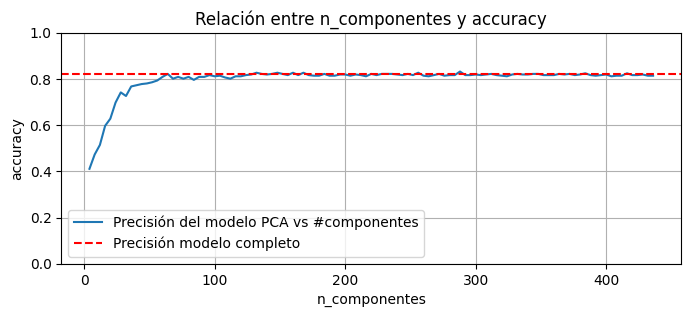

Máxima precisión: 83.20% para n_components = 288


In [36]:
# Graficar los resultados
plt.figure(figsize=(8,3))
plt.plot(df_results['n_components'], df_results['accuracy'], label = 'Precisión del modelo PCA vs #componentes')
plt.title('Relación entre n_componentes y accuracy')
plt.axhline(y=0.8217054263565892, linestyle='--', color='r', label = 'Precisión modelo completo')
plt.xlabel('n_componentes')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

max_accuracy = df_results["accuracy"].max()
best_n_components = df_results.loc[df_results["accuracy"].idxmax(), "n_components"]
print("Máxima precisión: {:.2f}% para n_components = {}".format(max_accuracy*100, best_n_components))

df_results.to_csv("acuracyEigenFaces.csv")

Al realizar el análisis con el modelo con PCA se puede observar que con n=288 componentes se tiene una precisión máxima del 83.20%. Teniendo en cuenta esto, el modelo de PCA de nuevo muestra que necesita menos componentes para lograr una precisión alta, pero el modelo sin PCA en este caso también tuvo unos buenos resultados si se compara con el modelo de PCA

# Conclusiones

- La mejora del rendimiento del modelo es una de las ventajas más importantes de la implementación de PCA en un modelo de aprendizaje automático. La reducción de la dimensionalidad y la multicolinealidad que proporciona PCA puede ayudar a mejorar el rendimiento del modelo de varias maneras:

 * Reducción del sobreajuste (overfitting): Al reducir la dimensionalidad del conjunto de datos, PCA puede reducir el riesgo de sobreajuste. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos

 * PCA puede ayudar a evitar el sobreajuste al eliminar las características irrelevantes y ruidosas que pueden ser únicas en los datos de entrenamiento, pero no en los datos de prueba o de producción.

 * Mejora de la precisión: Al eliminar las características irrelevantes, ruidosas o altamente correlacionadas, PCA puede ayudar a mejorar la precisión del modelo al reducir la interferencia de estas características en la predicción.

 * Reducción del tiempo de entrenamiento: Al reducir la dimensionalidad del conjunto de datos, PCA puede reducir el tiempo de entrenamiento del modelo, ya que el modelo tiene menos características para procesar y computar.

 * Mejora de la interpretación: Al reducir la dimensionalidad, PCA puede ayudar a mejorar la interpretación del modelo, ya que es más fácil visualizar y entender las variables principales del modelo. 

- Al observar los rostros en el espacio de entrada y en el espacio latente, podemos apreciar claramente la relación que existe entre el número de componentes y la varianza, ya que inicialmente, cuando tomamos pocas componentes para realizar PCA, no abarcamos un valor de varianza lo suficientemente grande como para hacer que las imagenes representadas sean distinguibles; en cambio, cuanto tomamos un número de componentes muy alto (que cubra mas del 90% de la varianza) los cambios introducidos sobre las imagenes son casi inapreciables, lo cual se debe a que estas componentes aportan muy poca varianza.

- En general, se puede decir que el modelo con PCA mejora los casos en los que el conjunto de datos es muy grande, ya que éste ayuda a reducir la complejidad del modelo. En otros casos, no hay mejoras significativas e incluso, se puede tener una pérdida de información importante.